# **Parcial II: Monte Carlo**
# **Física Computacional I**

### **Nombre:**  
### **Código:** 

In [79]:
import random, math
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

J = 1

def energy(S, N, h, nbr):
        E = 0.0
        for k in range(N):
            # La energía corresponde a la interacción del espín con cada uno de sus vecinos próximos
            E = -J * S[k] * sum(S[nn] for nn in nbr[k]) - S[k]*h
        return 0.5 * E

def evolucion(S, L, T, h):
    # Función que calcula la energía total del sistema

    N = L*L
    # Da los vecinos próximos de cada espín i
    nbr = {i: ((i//L) * L + (i + 1) % L, (i + L) % N,
               (i//L) * L + (i - 1) % L, (i - L) % N) \
                                      for i in range(N)}
    
    # Temperatura
    beta = 1.0 / T
    # S = [1 for k in range(N)]
    
    S_ini = np.copy(S)
    S_mat_ini = np.reshape(S, (L,L))

    # Número de pasos
    nsteps = N * 100
    Energy = energy(S, N, h, nbr)

    E = []

    for step in range(nsteps):
        k = np.random.randint(0, N-1)
        delta_E = J * 2.0 * S[k] * sum(S[nn] for nn in nbr[k]) + 2 * S[k] * h
        if np.random.uniform(0.0, 1.0) < np.exp(-beta * delta_E):
            S[k] *= -1
            Energy += delta_E
        E.append(Energy)

    S_mat_end = np.reshape(S, (L,L))
    S_end = np.copy(S)

    M = np.sum(S_end)/N
    X = beta * ((sum(S))**2 - (sum(S)/N)**2)
    
    
    return S_end, M
    
    #EM = np.sum(E)/float(len(E) * N)
    
    
    #print("Energía media por espín: ", np.sum(E)/float(len(E) * N))

Para J=1, grafique las curvas $M$ vs $h$ para 5 temperaturas diferentes.

 20%|█████████████████████████▊                                                                                                       | 1/5 [18:12<1:12:51, 1092.75s/it]


KeyboardInterrupt: 

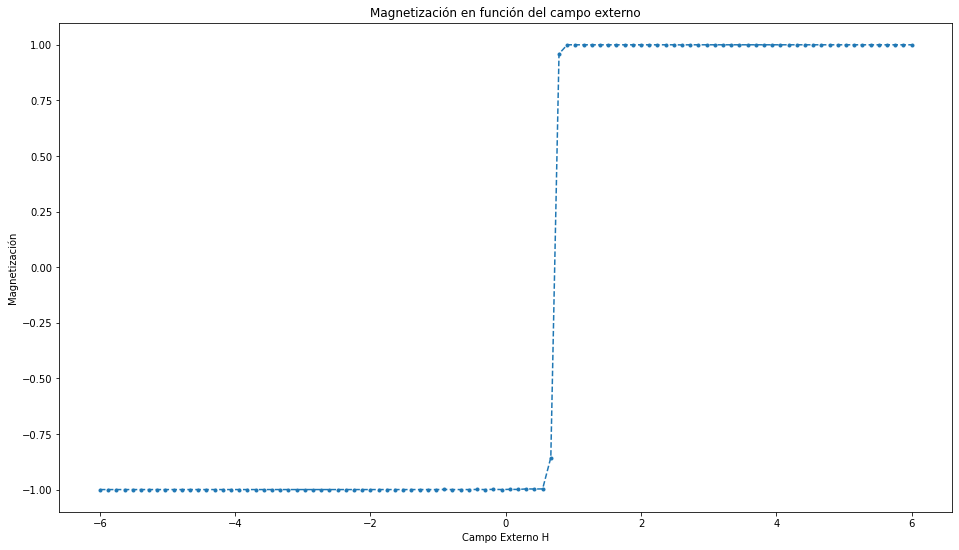

In [3]:
hn = 100
H = np.linspace(-6, 6, hn)
T = [1, 2, 2.5, 3, 5]

L = 64
init = [np.random.choice([1, -1]) for k in range(L*L)]

plt.figure(figsize=(16,9))
plt.title("Magnetización en función del campo externo")
plt.xlabel("Campo Externo H")
plt.ylabel("Magnetización")

for i in tqdm(T):
    S = init
    M = np.zeros(hn)
    c = 0
    for j in H:
        s, m = evolucion(S, L, i, j)
        M[c] = m
        c += 1
        
    plt.plot(H, M, linestyle='--', marker='.',label = f"T = {i:.1f}")
    
plt.grid()
plt.legend()

In [21]:
hnn = 500

H_normal = np.linspace(-6, 6, hnn)
H_histeresis = np.concatenate((H_normal, H_normal[::-1]))

L = 16
S = [np.random.choice([1, -1]) for k in range(L*L)]

M_Histeresis = np.zeros(2*hnn)

for i, j in tqdm(enumerate(H_histeresis)):
    s, m = evolucion(S, L, 2, j)
    M_Histeresis[i] = m

plt.figure(figsize = (16,9))
plt.title("Ciclo de histéresis")
plt.xlabel("Campo magnético externo H")
plt.ylabel("Magnetización M")


plt.plot(H_histeresis, M_Histeresis, linestyle='--', marker='.',label = "T = 2.0" )
plt.legend()
plt.grid()
    

7it [00:02,  2.43it/s]


KeyboardInterrupt: 

In [85]:
def transition(S, L, h):
    N = 50
    T = np.linspace(1, 4, N)
    
    M = np.zeros(N)
    
    for i,j in enumerate(T):
        s, m = evolucion(S, L, j, h)
        M[i] = m
    
    plt.figure(figsize = (16,9))
    plt.title("Magnetización en función de la temperatura")
    plt.xlabel("Temperatura T")
    plt.ylabel("Magnetización M")
    plt.plot(T, M, label = f'Campo externo H = {h:.2f}')
    
    plt.legend()
    plt.grid()

In [ ]:
H = [0, 0.1, 0.5, 1, 2]

for i in tqdm(H):
    transition(S, L, i)

  0%|                                                                                                                                             | 0/5 [00:00<?, ?it/s]

In [77]:
def x_y(k, L):
    y = k // L
    x = k - y * L
    return x,y

def snapshots(S, L, h):
    fig, axs = plt.subplots(1, 5, sharey = True)
    fig.suptitle("Configuración de espines", y = 0.7)
    
    fig.set_size_inches((16,9))
    fig.subplots_adjust(hspace = 0, wspace = 0)
    
    T = [1, 2, 2.5, 3, 5]
    
    for i,j in enumerate(T):
        
        conf = [[0 for x in range(L)] for y in range(L)]
        
        s,m = evolucion(S, L, j, h)
        
        for k in range(L*L):
            x, y = x_y(k, L)
            conf[x][y] = s[k]
        
        axs[i].imshow(conf, extent = [0, L, 0, L], interpolation = 'nearest')
        axs[i].set_title(f'T = {j:.2f}')
    
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
    
    plt.set_cmap('jet')
    plt.show()

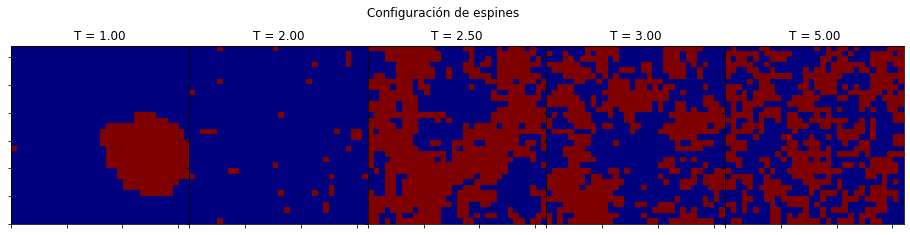

In [78]:
L = 32
S = [np.random.choice([1, -1]) for k in range(L*L)]

snapshots(S, L, 0.01)